# Instruction Tuning with GPT-4

This notebook is developed to produce the figures in the paper: 

```
``Instruction Tuning with GPT-4'' (https://arxiv.org/abs/2304.03277)
Baolin Peng*, Chunyuan Li*, Pengcheng He*, Michel Galley, Jianfeng Gao (*Equal Contribution)
```

- Project: https://instruction-tuning-with-gpt-4.github.io/
- Github Repo: https://github.com/Instruction-Tuning-with-GPT-4/GPT-4-LLM

Please submit an issue in the github repo, if you have any questions.

---
## Compare the data stats of GPT4 and GPT3 for Alpaca instructions.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

raw_phrases = pd.read_csv(r'data/gpt4_alpaca_verb_noun_output.csv')
raw_phrases = pd.DataFrame(raw_phrases)
phrases = pd.DataFrame(raw_phrases).dropna()
pd_count_gpt4 = phrases[["verb", "noun"]].groupby(["verb", "noun"]).size().sort_values(ascending=False)

raw_phrases = pd.read_csv(r'data/alpaca_verb_noun_output.csv')
raw_phrases = pd.DataFrame(raw_phrases)
phrases = pd.DataFrame(raw_phrases).dropna()
pd_count_gpt3 = phrases[["verb", "noun"]].groupby(["verb", "noun"]).size().sort_values(ascending=False)


In [2]:

top_k = 25

list_pair_gpt4, list_count_gpt4 = [], []
for verb_noun_pair, count in pd_count_gpt4[:top_k].to_dict().items():
    list_pair_gpt4.append(verb_noun_pair)
    list_count_gpt4.append(count)


list_pair_gpt3, list_count_gpt3 = [], []
for verb_noun_pair, count in pd_count_gpt3[:top_k].to_dict().items():
    list_pair_gpt3.append(verb_noun_pair)
    list_count_gpt3.append(count)


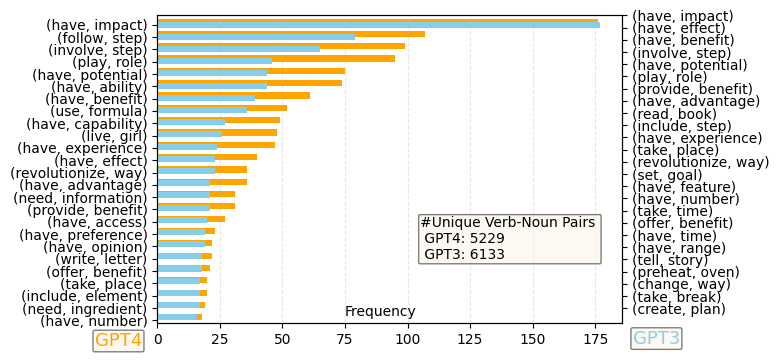

In [3]:
list_count_gpt4
list_count_gpt3

fig = plt.figure(figsize=(6,4)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5


pd_count_gpt4[:top_k][::-1].plot(kind='barh', color='orange', ax=ax, width=width, position=0, alpha=1.0)
pd_count_gpt3[:top_k][::-1].plot(kind='barh', color='skyblue', ax=ax2, width=width, position=2, alpha=1.0)

ax.set_xlabel('Frequency', color='k')
ax.xaxis.set_label_coords(0.48, 0.06) 

ax.set_ylabel('', color='k')
ax2.set_ylabel('', color='k')


plt.text(105,4, '#Unique Verb-Noun Pairs \n GPT4: 5229 \n GPT3: 6133', color='k', fontsize=10, bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'pad': 1, 'boxstyle': "round,pad=0.1"})

plt.text(-25,-3.1, 'GPT4', color='orange', fontsize=13, bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'pad': 1, 'boxstyle': "round,pad=0.1"})
plt.text(190,-2.9,'GPT3', color='skyblue', fontsize=13, bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'pad': 1, 'boxstyle': "round,pad=0.1"})
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
plt.show()
fig.savefig('output/cmp_freq_gpt3_gpt4.pdf', bbox_inches='tight')

In [4]:
import pandas as pd
import json
import tqdm


generated_data_path = "data/gpt4_alpaca_data_0329.json"

machine_generated_tasks = []
with open(generated_data_path, 'r') as fin:
    machine_generated_tasks = json.load(fin)
gpt4_output_len = [len(task["output"].split()) for task in machine_generated_tasks]

generated_data_path = "data/alpaca_data.json"

machine_generated_tasks = []
with open(generated_data_path, 'r') as fin:
    machine_generated_tasks = json.load(fin)
gpt3_output_len = [len(task["output"].split()) for task in machine_generated_tasks]

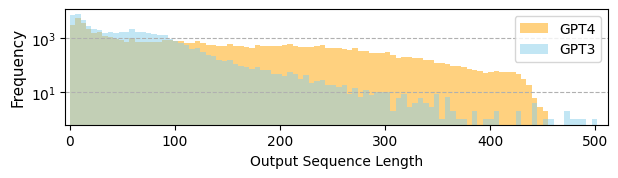

In [5]:
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(7,1.5)) # Create matplotlib figure
bins = np.linspace(0, 512, 100)

plt.hist(gpt4_output_len, bins, alpha=0.5, label='GPT4', color='orange')
plt.hist(gpt3_output_len, bins, alpha=0.5, label='GPT3', color='skyblue')

ax = plt.gca() 
plt.xlim(-4,512)

ax.set_yscale('log')
ax.yaxis.grid(True, linestyle='--', alpha=1.0)

plt.xlabel('Output Sequence Length', fontsize=10)
plt.ylabel('Frequency', fontsize=11)

plt.legend(loc='upper right')
plt.show()
fig.savefig('output/cmp_seq_len_freq_gpt3_gpt4.pdf', bbox_inches='tight')

--- 

## Comparison/Feedback Data Disitrution

#### Three models: ['text-davinci-003', 'icm-1.3b', 'gpt4']

dict_keys(['text-davinci-003', 'icm-1.3b', 'gpt4'])
text-davinci-003 : 51183
icm-1.3b : 51428
gpt4 : 51445


<Figure size 400x300 with 0 Axes>

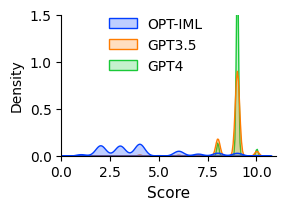

In [6]:

import os, json
import numpy as np
import pandas as pd
import seaborn as sns

f_instructions = open(os.path.expanduser("data/cmp_data_scores.json"), 'r', encoding='utf-8')
score_dict = json.load(f_instructions)

print(score_dict.keys())
min_num = 0
for key, value in score_dict.items():
    print(f'{key} : {len(value)}')
    if min_num == 0:
        min_num = len(value)
    else:
        if len(value) < min_num:
            min_num = len(value)


fig = plt.figure(figsize=(4,3)) # Create matplotlib figure
scores = pd.DataFrame({'OPT-IML': score_dict['icm-1.3b'][:min_num], 'GPT3.5': score_dict['text-davinci-003'][:min_num], 'GPT4': score_dict['gpt4'][:min_num]})
g = sns.displot(data=scores,  kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=2.0, aspect=1.5, legend=True)

sns.move_legend(g, "upper left", bbox_to_anchor=(.25, .95), title='')

# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax = plt.gca() 
plt.xlim(0,11)
plt.ylim(0.0,1.5)
plt.xlabel('Score', fontsize=11)

plt.show()
fig.savefig('output/cmp_data_dist.png', bbox_inches='tight')




---

# Evaluation benchmark data analysis

#### * 252 unseen user oriented instructions from self-instruct (https://github.com/yizhongw/self-instruct/blob/main/human_eval/user_oriented_instructions.jsonl)

In [7]:
 
import os
f_instructions = open(os.path.expanduser("data/user_oriented_instructions.jsonl"), 'r', encoding='utf-8')

motivation_apps = []
for i in f_instructions:
    app = json.loads(i)['motivation_app']
    motivation_apps.append(app)


motivation_apps = list(set(motivation_apps))
print(f'The number of applications considered: {len(motivation_apps)} \n {motivation_apps}')



The number of applications considered: 71 
 ['Airbnb', 'Notion', 'YouTube', 'Yelp', 'Weather', '(Wolfram alpha)?', 'Jira', 'w3schools', 'Grammarly', 'Messenger', 'Redfin', 'National Geographic', 'Reddit', 'StackOverflow', 'Wysa', 'https://cohere.ai/', 'Facebook', 'Indeed', 'Wikipedia', 'Sudoku', 'Workout', 'Telegram', 'Twitter', 'Google Meet', 'Quora', 'Semantic Scholar', 'Overleaf', 'Github', 'Goodreads', 'Blogger', 'Google Docs', 'Google Calendar', 'Instagram', 'IMDB', 'MS Powerpoint', 'ESPN', 'MS Word', 'Gmail', 'yelp', 'Google Scholar', 'Wordle', 'LinkedIn', 'you.com (YouWrite)', 'Scribd', 'Google Sheet', 'Strava', 'Spotify', 'tripadvisor.com', 'Leetcode', 'sth related to real estate?', 'CNN News', 'Coursera', 'Doulingo', 'Google Map', 'GeeksforGeeks', 'merriam-webster.com', 'Wolfram alpha', 'Play Store', 'Netflix', 'Amazon', 'instructables', 'ludwig.guru', 'Socratic by Google', 'Meetup', 'https://abcnotation.com/', 'Google Sheets', 'Explainpaper', 'Markdown', 'Google Search', 'Tas

#### * 80 unseen instructions from Vicuna (https://github.com/lm-sys/FastChat/blob/main/fastchat/eval/table/question.jsonl)

In [8]:
import os, json
f_instructions = open(os.path.expanduser("data/vicuna_question_80.jsonl"), 'r', encoding='utf-8')

motivation_apps = []
for i in f_instructions:
    app = json.loads(i)['category']
    motivation_apps.append(app)


motivation_apps = list(set(motivation_apps))
print(f'The number of domains considered: {len(motivation_apps)} \n {motivation_apps}')



The number of domains considered: 9 
 ['counterfactual', 'common-sense', 'coding', 'roleplay', 'knowledge', 'math', 'writing', 'fermi', 'generic']


---

## Pie Chart on the Human Evaluation Results

The 252 instructions from self instruct is used

#### * LLaMA-GPT4 vs GPT

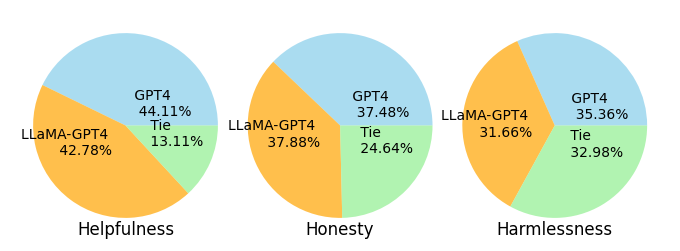

In [9]:
llama_gpt4_vs_gpt4 = {'Helpfulness': {'llama_gpt4_win': 0.4278145695364238, 'gpt4_win': 0.4410596026490066, 'Tie': 0.1311258278145695}, 'Honesty': {'llama_gpt4_win': 0.37880794701986753, 'gpt4_win': 0.3748344370860927, 'Tie': 0.2463576158940397}, 'Harmlessness': {'llama_gpt4_win': 0.3165562913907285, 'gpt4_win': 0.3536423841059603, 'Tie': 0.32980132450331123}}


fig, axs = plt.subplots(1, 3, figsize=(9,3))

for i, (k,v) in enumerate(llama_gpt4_vs_gpt4.items()):
    colors = ['skyblue', 'orange', 'lightgreen']
    labels = [f" GPT4 \n  {v['gpt4_win']*100:.2f}%", f"LLaMA-GPT4 \n {v['llama_gpt4_win']*100:.2f}%", f" Tie \n {v['Tie']*100:.2f}%"]
    axs[i].pie(v.values(), labels=labels, colors=colors,  labeldistance=0.24, wedgeprops={'alpha':0.7})
    axs[i].set_title(k, y=-0.01)

plt.subplots_adjust(wspace=-.2)
plt.rcParams.update({'font.size': 10})    

plt.show()
fig.savefig('output/pie_llama_gpt4_vs_gpt4.pdf', bbox_inches='tight')


#### * LLaMA-GPT4 vs Alpaca (LLaMA-GPT3)

In [10]:
 llama_gpt3_vs_llam_gpt4 = { "Helpfulness":{ "llama_gpt3_win":0.19744318181818182, "llama_gpt4_win":0.5411931818181818, "Tie":0.26136363636363646 }, "Honesty":{ "llama_gpt3_win":0.31392045454545453, "llama_gpt4_win":0.2599431818181818, "Tie":0.42613636363636365 }, "Harmlessness":{ "llama_gpt3_win":0.25426136363636365, "llama_gpt4_win":0.16477272727272727, "Tie":0.5809659090909091 } }

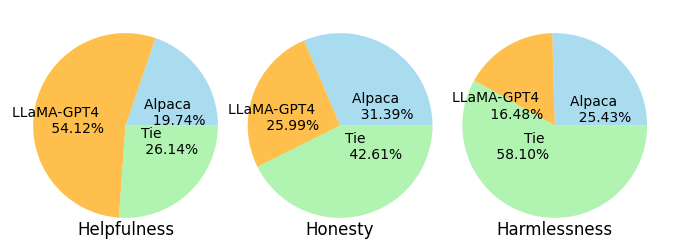

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(9,3))

for i, (k,v) in enumerate(llama_gpt3_vs_llam_gpt4.items()):
    colors = ['skyblue', 'orange', 'lightgreen']
    labels = [f"Alpaca \n  {v['llama_gpt3_win']*100:.2f}%", f"LLaMA-GPT4 \n {v['llama_gpt4_win']*100:.2f}%", f"Tie \n {v['Tie']*100:.2f}%"]
    axs[i].pie(v.values(), labels=labels, colors=colors,  labeldistance=.24, wedgeprops={'alpha':0.7})
    axs[i].set_title(k, y=-0.01)

plt.subplots_adjust(wspace=-.2)
plt.rcParams.update({'font.size': 10})    

plt.show()
fig.savefig('output/pie_llama_gpt3_vs_llam_gpt4.pdf', bbox_inches='tight')


---

## GPT4 Evaluation

The 80 questions from Vicuna is used (https://github.com/lm-sys/FastChat)

#### * All chatbots are compared against gpt4

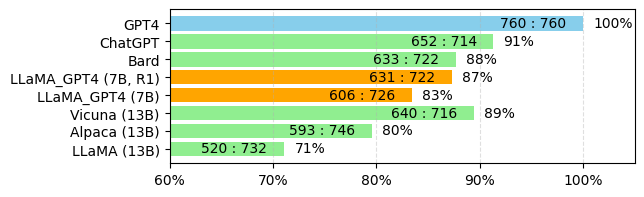

In [12]:
review_gpt35_gpt4 = [652.0, 714.0]
review_gpt4_gpt35 = [613.0, 521.0]
review_llama_gpt4_gpt4 = [606.0, 726.5]
review_llama_gpt4_gpt4_r1 = [631.0, 722.5] 
review_llama_gpt4 = [520.0, 731.5]
review_alpaca_gpt4 = [593.0, 745.5]
review_vicuna_gpt4 = [640.0, 715.5]
review_bard_gpt4 = [633.0, 722.0]
review_gpt4_gpt4 = [760.0, 760.0]


name_list = [ 'LLaMA (13B)', 'Alpaca (13B)', 'Vicuna (13B)',  'LLaMA_GPT4 (7B)', 'LLaMA_GPT4 (7B, R1)',  'Bard', 'ChatGPT', 'GPT4']
score_list = [review_llama_gpt4, review_alpaca_gpt4, review_vicuna_gpt4, review_llama_gpt4_gpt4, review_llama_gpt4_gpt4_r1, review_bard_gpt4, review_gpt35_gpt4, review_gpt4_gpt4]
color_list = [ 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'lightgreen', 'skyblue']

ratios = []
for lst in score_list:
    ratios.append(lst[0] / lst[1] * 100.0)

fig=plt.figure(figsize=(6,2.0))
ax = plt.gca() 
ax.xaxis.grid(True, linestyle='--', alpha=0.4)

plt.barh(name_list, ratios, color=color_list)

for index, value in enumerate(ratios):
    plt.text(value+1, index-.2, "{:.0f}%".format(value))
    plt.text(value-8, index-.2, f"{score_list[index][0]:.0f} : {score_list[index][1]:.0f}")

plt.xlim(60, 105)
# Left Y-axis labels
plt.xticks((60, 70, 80, 90, 100), ('60%', '70%', '80%', '90%', '100%'), color='k', size=10)
plt.show()

fig.savefig('output/bar_score_all_vs_gpt4.pdf', bbox_inches='tight')


#### * All chatbots are compared against ChatGPT

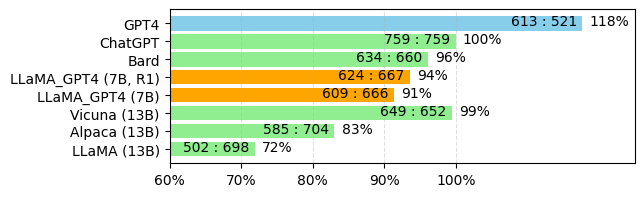

In [13]:
review_gpt35_gpt35 = [759.0, 759.0]
review_llama_gpt4_gpt35 = [609.0, 666.5] # [609.0, 669.0]
review_llama_gpt4_gpt35_r1 = [624.0, 667.0] # [601.0, 674.0]
review_llama_gpt35 = [502.0, 698.5]
review_alpaca_gpt35 = [585.0, 704.5]
review_vicuna_gpt35 = [649.0, 652.5]
review_bard_gpt35 = [634.0, 660.0]
review_gpt4_gpt35 = [613.0, 521.0]



name_list = [ 'LLaMA (13B)', 'Alpaca (13B)', 'Vicuna (13B)',  'LLaMA_GPT4 (7B)', 'LLaMA_GPT4 (7B, R1)', 'Bard', 'ChatGPT', 'GPT4'] # 'LLaMA_GPT4 (13B)'
score_list = [review_llama_gpt35, review_alpaca_gpt35, review_vicuna_gpt35, review_llama_gpt4_gpt35, review_llama_gpt4_gpt35_r1, review_bard_gpt35, review_gpt35_gpt35, review_gpt4_gpt35]
color_list = [ 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'lightgreen', 'skyblue']

ratios = []
for lst in score_list:
    ratios.append(lst[0] / lst[1] * 100.0)

fig=plt.figure(figsize=(6,2.0))
ax = plt.gca() 
ax.xaxis.grid(True, linestyle='--', alpha=0.4)

plt.barh(name_list, ratios, color=color_list)

for index, value in enumerate(ratios):
    plt.text(value+1, index-.1, "{:.0f}%".format(value))
    plt.text(value-10, index-.1, f"{score_list[index][0]:.0f} : {score_list[index][1]:.0f}")

plt.xlim(60, 125)
# Left Y-axis labels
plt.xticks((60, 70, 80, 90, 100), ('60%', '70%', '80%', '90%', '100%'), color='k', size=10)
plt.show()

fig.savefig('output/bar_score_all_vs_gpt35.pdf', bbox_inches='tight')

#### * The effectivness of the reward model: each ranked group is comapared against GPT and ChatGPT, respectively

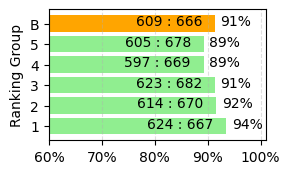

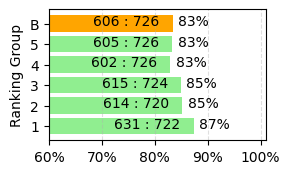

In [14]:
import re

llama_gpt4_rank0_gpt35 = [624.0, 667.0]
llama_gpt4_rank0_gpt4 = [631.0, 722.5]
llama_gpt4_rank1_gpt35 = [614.0, 670.0]
llama_gpt4_rank1_gpt4 = [614.0, 720.5]
llama_gpt4_rank2_gpt35 = [623.0, 681.5]
llama_gpt4_rank2_gpt4 = [615.0, 724.0]
llama_gpt4_rank3_gpt35 = [597.0, 669.0]
llama_gpt4_rank3_gpt4 = [602.0, 726.0]
llama_gpt4_rank4_gpt35 = [605.0, 677.5]
llama_gpt4_rank4_gpt4 = [605.0, 726.0]


review_llama_gpt4_gpt4 = [606.0, 726.5]
review_llama_gpt4_gpt35 = [609.0, 666.5]


llama_gpt4_ranks_gpt35 = [[624.0, 667.0], [614.0, 670.0], [623.0, 681.5], [597.0, 669.0], [605.0, 677.5]] + [review_llama_gpt4_gpt35]
llama_gpt4_ranks_gpt4 = [[631.0, 722.5], [614.0, 720.5], [615.0, 724.0], [602.0, 726.0], [605.0, 726.0]] + [review_llama_gpt4_gpt4]
name_list = [str(i+1) for i in range(5)]

name_list += ['B']
color_list = [ 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'orange']

def plot_bar(score_list, name_list, file_name):
    ratios = []
    for lst in score_list:
        ratios.append(lst[0] / lst[1] * 100.0)

    fig=plt.figure(figsize=(2.8,1.7))
    ax = plt.gca() 
    ax.xaxis.grid(True, linestyle='--', alpha=0.4)

    plt.barh(name_list, ratios, color=color_list)

    for index, value in enumerate(ratios):
        plt.text(value+1, index-.1, "{:.0f}%".format(value))
        plt.text(value-15, index-.1, f"{score_list[index][0]:.0f} : {score_list[index][1]:.0f}")

    plt.ylabel('Ranking Group', fontsize=10)

    plt.xlim(60, 101)
    # Left Y-axis labels
    plt.xticks((60, 70, 80, 90, 100), ('60%', '70%', '80%', '90%', '100%'), color='k', size=10)
    plt.show()

    fig.savefig(file_name, bbox_inches='tight')

plot_bar(llama_gpt4_ranks_gpt35, name_list, 'output/bar_score_ranking_vs_gpt35.pdf')
plot_bar(llama_gpt4_ranks_gpt4, name_list,  'output/bar_score_ranking_vs_gpt4.pdf')



---
## Chinese Instruction-Following Performance

#### All chatbots (answers are translated from English to Chiense) are compared with GPT4

- *gpt_4_t: translated Chinese answers
- *gpt_4_g: generated Chinese anwsers

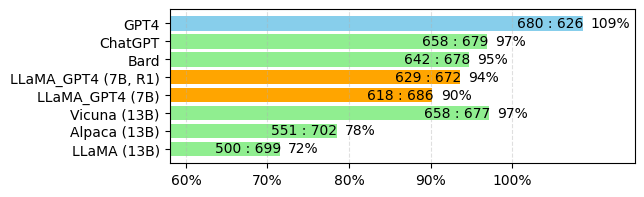

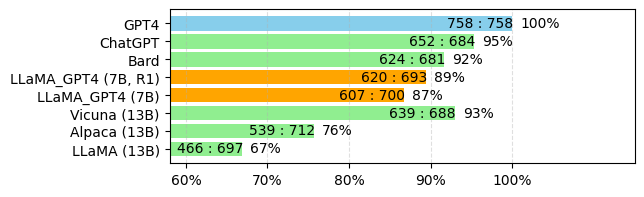

In [15]:
llama_13b_t_gpt4_g_cn = [500.0, 699.0]
llama_13b_t_gpt4_t_cn = [466.0, 697.0]
vicuna_13b_t_gpt4_g_cn = [658.0, 677.0]
vicuna_13b_t_gpt4_t_cn = [639.0, 687.5]
alpaca_13b_t_gpt4_g_cn = [551.0, 702.0]
alpaca_13b_t_gpt4_t_cn = [539.0, 712.0]
bard_t_gpt4_g_cn = [642.0, 678.0]
bard_t_gpt4_t_cn = [624.0, 681.0]
gpt35_t_gpt4_g_cn = [658.0, 679.0]
gpt35_t_gpt4_t_cn = [652.5, 684.5]
gpt4_t_gpt4_g_cn = [680.5, 626.5]
gpt4_t_gpt4_t_cn = [758.0, 758.0]
llama_gpt4_t_gpt4_g_cn = [618.5, 685.5]
llama_gpt4_t_gpt4_t_cn = [607.0, 700.0]
llama_gpt4_rank0_t_gpt4_g_cn = [629.0, 672.0]
llama_gpt4_rank0_t_gpt4_t_cn = [620.0, 693.0]

name_list = [ 'LLaMA (13B)', 'Alpaca (13B)', 'Vicuna (13B)',  'LLaMA_GPT4 (7B)', 'LLaMA_GPT4 (7B, R1)', 'Bard', 'ChatGPT', 'GPT4'] # 'LLaMA_GPT4 (13B)'
score_list_g = [llama_13b_t_gpt4_g_cn, alpaca_13b_t_gpt4_g_cn, vicuna_13b_t_gpt4_g_cn, llama_gpt4_t_gpt4_g_cn, llama_gpt4_rank0_t_gpt4_g_cn, bard_t_gpt4_g_cn, gpt35_t_gpt4_g_cn, gpt4_t_gpt4_g_cn]
score_list_t = [llama_13b_t_gpt4_t_cn, alpaca_13b_t_gpt4_t_cn, vicuna_13b_t_gpt4_t_cn, llama_gpt4_t_gpt4_t_cn, llama_gpt4_rank0_t_gpt4_t_cn, bard_t_gpt4_t_cn, gpt35_t_gpt4_t_cn, gpt4_t_gpt4_t_cn]
color_list = [ 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'lightgreen', 'skyblue']


def plot_bar(score_list, name_list, xlim, file_name):
    ratios = []
    for lst in score_list:
        ratios.append(lst[0] / lst[1] * 100.0)

    fig=plt.figure(figsize=(6,2.0))
    ax = plt.gca() 
    ax.xaxis.grid(True, linestyle='--', alpha=0.4)

    plt.barh(name_list, ratios, color=color_list)

    for index, value in enumerate(ratios):
        plt.text(value+1, index-.2, "{:.0f}%".format(value))
        plt.text(value-8, index-.2, f"{score_list[index][0]:.0f} : {score_list[index][1]:.0f}")

    plt.xlim(xlim[0], xlim[1])
    # Left Y-axis labels
    plt.xticks((60, 70, 80, 90, 100), ('60%', '70%', '80%', '90%', '100%'), color='k', size=10)
    plt.show()

    fig.savefig(file_name, bbox_inches='tight')

plot_bar(score_list_g, name_list, (58, 115), 'output/bar_score_all_vs_gpt4_g_cn.pdf')
plot_bar(score_list_t, name_list, (58, 115), 'output/bar_score_all_vs_gpt4_t_cn.pdf')

#### * All chatbots are compared with GPT4 (Both the instruction and answers are Chinese)

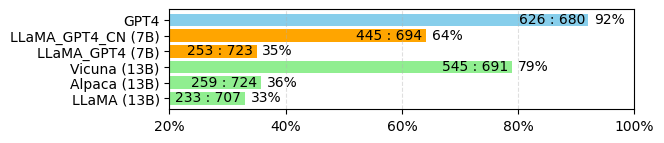

In [16]:
llama_to_question_t_gpt4_t_cn = [233.0, 707.0]
alpaca_to_question_t_gpt4_t_cn = [259.0, 724.0]
llama_gpt4_to_question_t_gpt4_t_cn = [253.0, 723.0]
llama_gpt4_cn_to_question_t_gpt4_t_cn = [356.0, 683.0]
llama_gpt4_cn_to_question_v2_t_gpt4_t_cn = [445.0, 694.0]



llama_gpt4_cn_to_question_v2_t_gpt4_g_cn = [463.0, 693.0]
gpt4_g_gpt4_t_cn = [626.5, 680.5]

vicuna_13b_to_question_v1_t_gpt4_g_cn = [545.0, 691.0]
vicuna_13b_to_question_v1_t_gpt4_t_cn = [526.5, 702.0]


name_list = [ 'LLaMA (13B)', 'Alpaca (13B)',  'Vicuna (13B)', 'LLaMA_GPT4 (7B)', 'LLaMA_GPT4_CN (7B)',  'GPT4'] # 'LLaMA_GPT4 (13B)'
score_list = [llama_to_question_t_gpt4_t_cn, alpaca_to_question_t_gpt4_t_cn, vicuna_13b_to_question_v1_t_gpt4_g_cn, llama_gpt4_to_question_t_gpt4_t_cn, llama_gpt4_cn_to_question_v2_t_gpt4_t_cn,  gpt4_g_gpt4_t_cn]
color_list = [ 'lightgreen', 'lightgreen',  'lightgreen', 'orange', 'orange', 'skyblue']

def plot_bar(score_list, name_list, xlim, file_name):
    ratios = []
    for lst in score_list:
        ratios.append(lst[0] / lst[1] * 100.0)

    fig=plt.figure(figsize=(6,1.3))
    ax = plt.gca() 
    ax.xaxis.grid(True, linestyle='--', alpha=0.4)

    plt.barh(name_list, ratios, color=color_list)

    for index, value in enumerate(ratios):
        plt.text(value+1, index-.2, "{:.0f}%".format(value))
        plt.text(value-12, index-.2, f"{score_list[index][0]:.0f} : {score_list[index][1]:.0f}")

    plt.xlim(xlim[0], xlim[1])
    # Left Y-axis labels
    plt.xticks((20, 40, 60, 80, 100), ('20%', '40%', '60%', '80%', '100%'), color='k', size=10)
    plt.show()

    fig.savefig(file_name, bbox_inches='tight')

plot_bar(score_list, name_list, (20, 100), 'output/bar_score_all_gen_cn_vs_gpt4_t_cn.pdf')

## Unnatural Instruction Breakdown Performance

In [17]:


import os, json

len_req = ['0-2', '3-5', '6-10', '10-', 'ALL']

res_dict = {}
for l in len_req:
    f_data = open(os.path.expanduser(f"data/eval_unnatural_instructions/gpt4_unnatural_instruction_results_h9000_len{l}.json"), 'r', encoding='utf-8')
    data = json.load(f_data)

    for d in data:
        if d["Model"] not in res_dict:
            res_dict[d["Model"]] = [ d["rougeL"]]
        else:
            res_dict[d["Model"]].append(d["rougeL"])  
            

print(res_dict)

{'Alpaca-GPT4': [0.31707959491942583, 0.29614883200033626, 0.39029242633895994, 0.4118854298955491, 0.34467723453714916], 'Alpaca': [0.4165098753921288, 0.3442310128644717, 0.36474946600141755, 0.33977007931435893, 0.38599969448111626], 'GPT4': [0.3602531444671222, 0.30546631154753745, 0.37702486219580666, 0.416627274621374, 0.3697349140194752]}


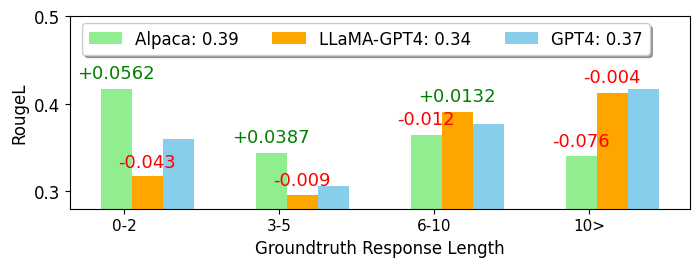

In [18]:
fig=plt.figure(figsize=(8,2.5))

bars = ['0-2', '3-5', '6-10', '10>']
x_pos = np.arange(len(bars))


means = {k:v[-1] for k, v in res_dict.items()}

means_Alpaca = means['Alpaca']
means_Alpaca_GPT4 = means['Alpaca-GPT4']
means_GPT4 = means['GPT4']

bar_plot1 = plt.bar(x_pos-0.2, res_dict['Alpaca'][:-1], color=['lightgreen'], width = 0.2, label=f'Alpaca: {means_Alpaca:.2f}')
bar_plot2 = plt.bar(x_pos, res_dict['Alpaca-GPT4'][:-1], color=['orange'], width = 0.2, label=f'LLaMA-GPT4: {means_Alpaca_GPT4:.2f}')
plt.bar(x_pos+0.2, res_dict['GPT4'][:-1], color=['skyblue'], width = 0.2, label=f'GPT4: {means_GPT4:.2f}')

bar_label = [ res_dict['Alpaca-GPT4'][i]-res_dict['GPT4'][i] for i in range(len(bars))]
bar_label_color = [ 1 if b>0 else 0 for b in bar_label ]
bar_label = ['+'+str(b)[:6] if b>0 else '-'+str(b)[1:6] for b in bar_label ]

def autolabel(rects):
    for idx,rect in enumerate(bar_plot2):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0, size=13, color='green' if bar_label_color[idx]==1 else 'red')

autolabel(bar_plot2)


bar_label = [ res_dict['Alpaca'][i]-res_dict['GPT4'][i] for i in range(len(bars))]
bar_label_color = [ 1 if b>0 else 0 for b in bar_label ]
bar_label = ['+'+str(b)[:6] if b>0 else '-'+str(b)[1:6] for b in bar_label ]

def autolabel(rects):
    for idx,rect in enumerate(bar_plot1):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0, size=13, color='green' if bar_label_color[idx]==1 else 'red')

autolabel(bar_plot1)


leg = plt.legend(fontsize=12, shadow=True, loc=(0.02, 0.8), ncol=3)
plt.xticks(x_pos-0.15, bars, rotation=0, color='k', size=11)
plt.yticks( (0.0, 0.1, 0.2, 0.3, 0.4, 0.5), ('0.0','0.1','0.2', '0.3','0.4','0.5'), color='k', size=12)


plt.xlabel('Groundtruth Response Length', fontsize=12)
plt.ylabel('RougeL', fontsize=12)


plt.xlim(-0.5,len(bars)-0.5)
plt.ylim(0.28,0.5)
plt.show()


fig.savefig('output/bar_unnatural.pdf', bbox_inches='tight')